In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import os, sys, getpass
user = getpass.getuser()
sys.path.append(f'/home/{user}/codes/hpe_library/')
from hpe_library.lib_import import *
from hpe_library. my_utils import *


### check num camera

In [19]:
folder_list = ['h36m_gt_pkl', 'h36m_gt_pkl_canonical_3d_fixed_dist', 'h36m_gt_pkl_canonical_3d_same_dist', 'h36m_gt_pkl_canonical_3d_same_z']
for folder in folder_list:
    print(folder)
    subject_list = {}
    for item in os.listdir(folder):
        subject, cam_id, action = item.split('.')[0].split('_')
        if subject not in subject_list:
            subject_list[subject] = {}
            subject_list[subject][action] = {cam_id}
        else:
            if action not in subject_list[subject]:
                subject_list[subject][action] = {cam_id}
            else:
                subject_list[subject][action].add(cam_id)

    for subject in subject_list.keys():
        for action in subject_list[subject].keys():
            if len(subject_list[subject][action]) != 4:
                print(subject, action, subject_list[subject][action])

h36m_gt_pkl
h36m_gt_pkl_canonical_3d_fixed_dist
h36m_gt_pkl_canonical_3d_same_dist
h36m_gt_pkl_canonical_3d_same_z


In [20]:
folder_list = ['fit3d_gt_pkl', 'fit3d_gt_pkl_canonical_3d_same_z']
for folder in folder_list:
    print(folder)
    subject_list = {}
    for item in os.listdir(folder):
        splited = item.split('.')[0].split('_')
        subject = splited[0]
        cam_id = splited[1]
        action = '_'.join(splited[2:])
        if subject not in subject_list:
            subject_list[subject] = {}
            subject_list[subject][action] = {cam_id}
        else:
            if action not in subject_list[subject]:
                subject_list[subject][action] = {cam_id}
            else:
                subject_list[subject][action].add(cam_id)

    for subject in subject_list.keys():
        for action in subject_list[subject].keys():
            if len(subject_list[subject][action]) != 4:
                print(subject, action, subject_list[subject][action])

fit3d_gt_pkl
fit3d_gt_pkl_canonical_3d_same_z


### check pkl file

In [2]:
os.chdir('/home/hrai/codes/MotionBERT/data/motion3d')
pkl_list = glob(('*.pkl'))
pkl_list

['fit3d_gt_canonical_3d_same_z_all_test.pkl',
 'h36m_gt_canonical_3d_same_dist_s15678_tr_54138969_ts_others.pkl',
 '3dhp_gt_test_canonical_3d_from_same_z_TS1_6.pkl',
 'fit3d_gt_canonical_3d_same_z_tr_s03.pkl',
 'h36m_gt_canonical_3d_same_z_tr_s1_ts_s5678.pkl',
 '3dhp_gt_test_TS1_4.pkl',
 'h36m_gt_canonical_3d_same_dist_tr_s1_ts_s5678.pkl',
 '3dhp_gt_test_canonical_3d_from_fixed_dist_5_TS1_6.pkl',
 'fit3d_all_train_except_target_action.pkl',
 'h36m_sh_conf_cam_source_final.pkl',
 'h36m_gt_canonical_3d_same_z.pkl',
 '3dhp_gt_test_all_train.pkl',
 '3dhp_gt_test_canonical_3d_from_same_z_TS1_4.pkl',
 'h36m_gt_dict.pkl',
 'fit3d_gt_all_test.pkl',
 'h36m_gt_s15678_tr_54138969_ts_others.pkl',
 'h36m_gt_canonical_3d_fixed_dist_5_tr_s1_ts_s5678.pkl',
 'fit3d_gt_canonical_3d_same_z_all_test_dict.pkl',
 'h36m_gt.pkl',
 'h36m_gt_canonical_3d_same_dist.pkl',
 'h36m_gt_canonical_3d_fixed_dist_tr_s1_ts_s5678.pkl',
 '3dhp_gt_test_TS1_6.pkl',
 'h36m_gt_canonical_3d_fixed_dist_5.pkl',
 '3dhp_gt_canonical

In [3]:
pkl = readpkl('3dhp_gt_test_canonical_3d_from_fixed_dist_5_TS1_6.pkl')

In [10]:
W = [pkl['train']['cam_param'][i]['W'] for i in range(len(pkl['train']['cam_param']))]
H = [pkl['train']['cam_param'][i]['H'] for i in range(len(pkl['train']['cam_param']))]
set(W), set(H)

({2048}, {2048})

In [12]:
W = [pkl['test']['cam_param'][i]['W'] for i in range(len(pkl['test']['cam_param']))]
H = [pkl['test']['cam_param'][i]['H'] for i in range(len(pkl['test']['cam_param']))]
set(W), set(H)

({1920, 2048}, {1080, 2048})

In [8]:
for data_type in ['train', 'test']:
    subject_list = []
    for source in pkl[data_type]['source']:
        subject = source.split('_')[1]
        subject_list.append(subject)
    print(set(subject_list))

IndexError: list index out of range

In [14]:
for data_type in ['train', 'test']:
    print(data_type)
    for key in pkl[data_type].keys():
        if type(pkl[data_type][key]) is np.ndarray:
            print(key, type(pkl[data_type][key]), pkl[data_type][key].shape)
        elif type(pkl[data_type][key]) is list:
            print(key, type(pkl[data_type][key]), len(pkl[data_type][key]))
        else:
            print(key, type(pkl[data_type][key]))

train
joint_2d <class 'numpy.ndarray'> (243, 17, 2)
joint_2d_from_canonical_3d <class 'numpy.ndarray'> (243, 17, 3)
confidence <class 'numpy.ndarray'> (243, 17, 1)
camera_name <class 'numpy.ndarray'> (243,)
action <class 'numpy.ndarray'> (243,)
source <class 'numpy.ndarray'> (243,)
frame <class 'numpy.ndarray'> (243,)
cam_3d <class 'numpy.ndarray'> (243, 17, 3)
cam_3d_from_canonical_3d <class 'numpy.ndarray'> (243, 17, 3)
cam_param <class 'numpy.ndarray'> (243,)
test
joint_2d <class 'numpy.ndarray'> (24888, 17, 2)
joint_2d_from_canonical_3d <class 'numpy.ndarray'> (24888, 17, 3)
confidence <class 'numpy.ndarray'> (24888, 17, 1)
camera_name <class 'numpy.ndarray'> (24888,)
action <class 'numpy.ndarray'> (24888,)
source <class 'numpy.ndarray'> (24888,)
frame <class 'numpy.ndarray'> (24888,)
cam_3d <class 'numpy.ndarray'> (24888, 17, 3)
cam_3d_from_canonical_3d <class 'numpy.ndarray'> (24888, 17, 3)
cam_param <class 'numpy.ndarray'> (24888,)


In [64]:
pkl['test']['2.5d_factor']

array([4.656527 , 4.6566076, 4.6566916, ..., 2.8969798, 2.9066522,
       2.9163694], dtype=float32)

In [5]:
data_type = 'test'
frame_num = 150
test_pose = pkl[data_type]['joints_2.5d_image'][frame_num]
test_pose = test_pose - test_pose[0]
test_pose2 = pkl[data_type]['joint3d_image'][frame_num] 
test_pose2 = test_pose2 - test_pose2[0]
test_pose2 *= pkl[data_type]['2.5d_factor'][frame_num]

%matplotlib widget
fig = plt.figure(10, figsize=(10, 5))
fig.clear()
ax_3d = axes_3d(fig, loc=111, view=(-90,-90), xlim=(-1000,1000), ylim=(-1000,1000), zlim=(-1000,1000))

draw_3d_pose(ax_3d, test_pose)
draw_3d_pose(ax_3d, test_pose2, color='r')
plt.show()

KeyError: 'joints_2.5d_image'

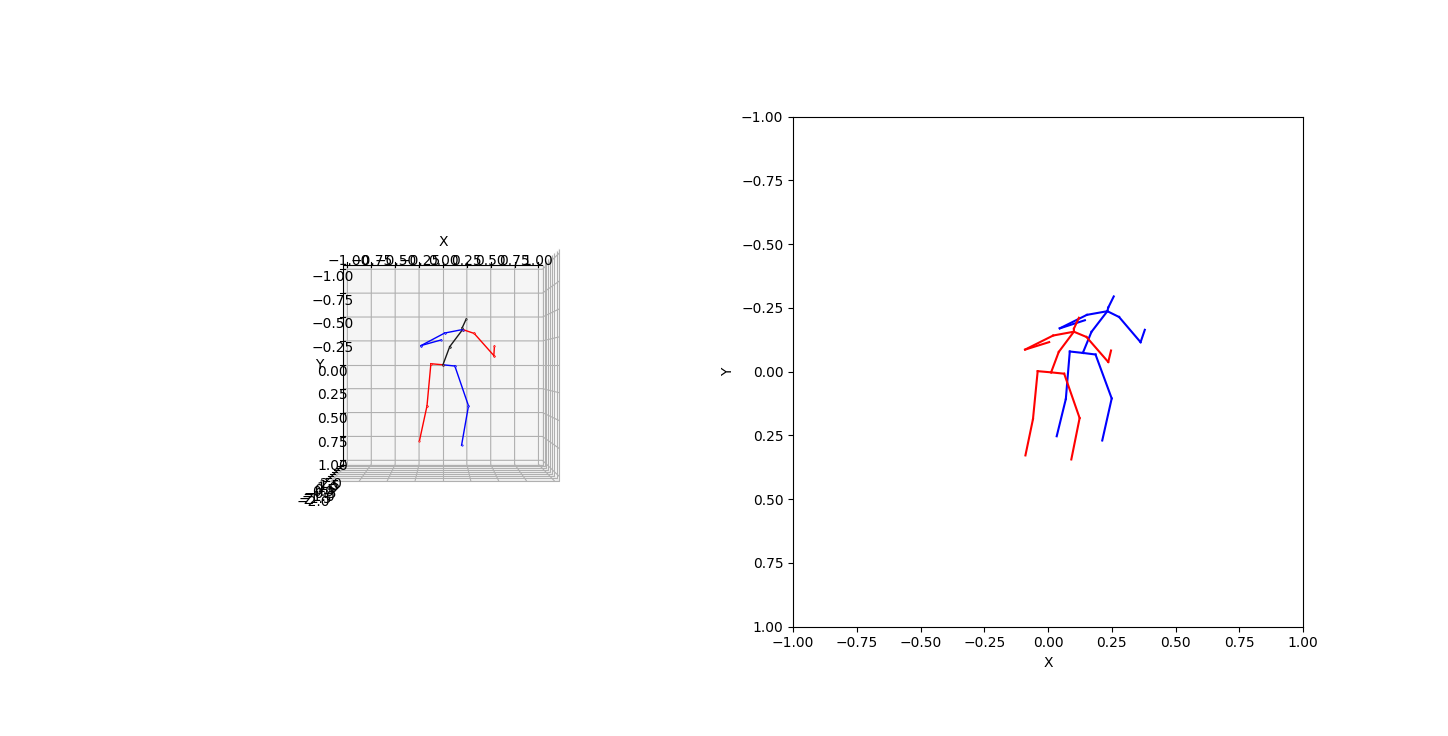

In [39]:
data_type = 'test'
frame_num = 1300000
joint_2d = pkl[data_type]['joint_2d'][frame_num]
joint_2d_from_canonical_3d = pkl[data_type]['joint_2d_from_canonical_3d'][frame_num]
joint_2d_norm = normalize_input(joint_2d, 900, 900)
joint_2d_from_canonical_3d_norm = normalize_input(joint_2d_from_canonical_3d, 900, 900)
cam_3d = pkl[data_type]['cam_3d'][frame_num]
cam_3d_hat = cam_3d - cam_3d[0]

%matplotlib widget
fig = plt.figure(10, figsize=(10, 5))
fig.clear()
ax_3d = axes_3d(fig, loc=121, view=(-90,-90), xlim=(-1,1), ylim=(-1,1))
ax_2d = axes_2d(fig, loc=122, W=900, H=900, normalize=True)
# draw_2d_pose(ax_2d, joint_2d, color='b')
# draw_2d_pose(ax_2d, joint_2d_from_canonical_3d, color='r')
draw_2d_pose(ax_2d, joint_2d_norm, color='b', normalize=True)
draw_2d_pose(ax_2d, joint_2d_from_canonical_3d_norm, color='r', normalize=True)
draw_3d_pose(ax_3d, cam_3d_hat)
plt.show()

In [33]:
joint_2d_from_canonical_3d_norm  - cam_3d_hat[..., :2]

array([[ 0.03823703, -0.00385139],
       [-0.0245184 , -0.00411406],
       [-0.05054913, -0.24896492],
       [-0.06345987, -0.49020985],
       [ 0.09947175, -0.00447468],
       [ 0.11929173, -0.24331146],
       [ 0.14854739, -0.47472237],
       [ 0.00736212,  0.05928134],
       [-0.03031978,  0.11057157],
       [-0.04974713,  0.12164029],
       [-0.04476326,  0.16818896],
       [-0.09668858,  0.12135507],
       [-0.13449232,  0.09002581],
       [-0.12795682, -0.01100809],
       [ 0.0519205 ,  0.10116331],
       [ 0.16925753,  0.05333662],
       [ 0.10482888, -0.04331472]])

### check converted data

In [4]:
data_list = glob(('MB3D_f243s81/*'))
data_list

['MB3D_f243s81/3DHP-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_SAME_Z-TEST_TS1_4',
 'MB3D_f243s81/H36M-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_FIXED_DIST_5-TR_S1_TS_S5678',
 'MB3D_f243s81/3DHP-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_FIXED_DIST_5-TEST_ALL_TRAIN',
 'MB3D_f243s81/FIT3D-GT-CAM_NO_FACTOR-TS_S4710',
 'MB3D_f243s81/H36M-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_SAME_DIST-S15678_TR_54138969_TS_OTHERS',
 'MB3D_f243s81/FIT3D-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_SAME_Z-TS_S4710',
 'MB3D_f243s81/H36M-SH',
 'MB3D_f243s81/H36M-CANONICALIZATION-GT-INPUT_FROM_3D_CANONICAL_SAME_Z-TR_S1_TS_S5678',
 'MB3D_f243s81/FIT3D-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_FIXED_DIST_5-ALL_TEST',
 'MB3D_f243s81/H36M-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_SAME_Z-TR_S1_TS_S5678',
 'MB3D_f243s81/H36M-GT-CAM_NO_FACTOR-S15678_TR_54138969_TS_OTHERS',
 'MB3D_f243s81/H36M-GT-CAM_NO_FACTOR',
 'MB3D_f243s81/3DHP-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_FIXED_DIST_5-TEST_TS1_6',
 'MB3D_f243s81/H36M-GT-CAM_N

(243, 17, 4) (243, 17, 3)
[[-0.01139551 -0.02490145  1.          1.        ]
 [-0.04348791 -0.02539021  1.          1.        ]
 [-0.02026057  0.11233377  1.          1.        ]
 [ 0.02322209  0.18720055  1.          1.        ]
 [ 0.02150619 -0.02440041  1.          1.        ]] [[-0.269205   0.118016   2.29046  ]
 [-0.3800805  0.116327   2.352725 ]
 [-0.300767   0.606753   2.50712  ]
 [-0.140694   0.905635   2.7299   ]
 [-0.1583295  0.119705   2.228195 ]]


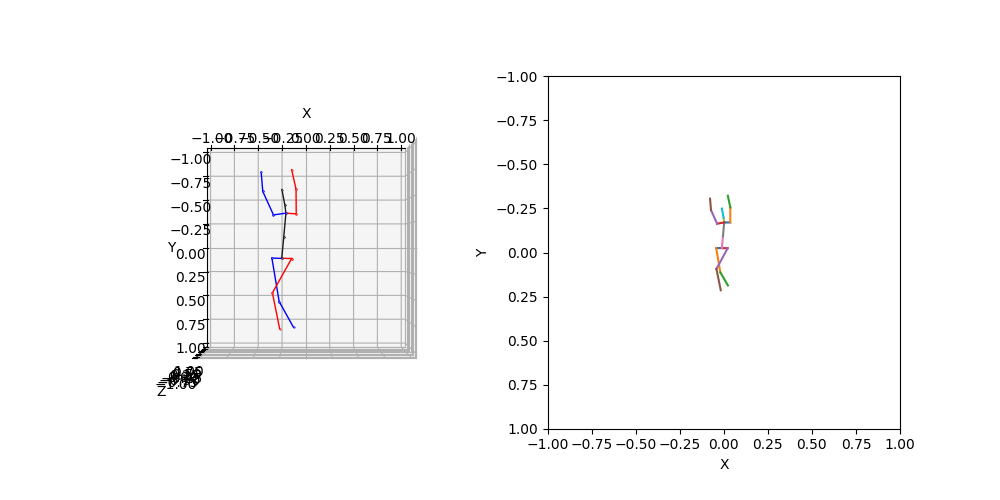

In [5]:
for data_type in ['test']:
    data_list = natsorted(glob(f'./MB3D_f243s81/3DHP-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_FIXED_DIST_5-TEST_ALL_TRAIN/{data_type}/*.pkl'))
    data = readpkl(data_list[0])
    print(np.array(data['data_input']).shape, np.array(data['data_label']).shape)
    frame_num = 200
    input_2d = data['data_input'][frame_num]
    gt_3d = data['data_label'][frame_num]
    print(input_2d[:5], gt_3d[:5])

%matplotlib widget
fig = plt.figure(1, figsize=(10, 5))
fig.clear()
ax_3d = axes_3d(fig, loc=121, view=(-90,-90), xlim=(-1,1), ylim=(-1,1), zlim=(-1,1))
ax_2d = axes_2d(fig, loc=122, normalize=True)

draw_3d_pose(ax_3d, gt_3d)
draw_2d_pose(ax_2d, input_2d, normalize=True)
plt.show()

In [10]:
input_2d_hat = input_2d - input_2d[0]
gt_2d = gt_3d[:, :2]
input_2d_hat[:, :2] - gt_2d

array([[-0.01769727, -0.01612982],
       [-0.01262865, -0.0187204 ],
       [-0.03427197, -0.00765856],
       [-0.02776342, -0.01098505],
       [-0.02265193, -0.01359753],
       [-0.02711158, -0.0113181 ],
       [-0.02429071, -0.01275995],
       [-0.01243757, -0.01881804],
       [-0.00984304, -0.0201441 ],
       [-0.01430727, -0.01786242],
       [-0.00852113, -0.02081975],
       [-0.01369508, -0.0181753 ],
       [-0.01917566, -0.01537419],
       [-0.02604128, -0.01186517],
       [-0.00485767, -0.02269213],
       [-0.00298721, -0.02364812],
       [-0.00614847, -0.02203235]], dtype=float32)